![aaron judge](judge_wide.jpg)

This is Aaron Judge. Judge is one of the physically largest players in Major League Baseball standing 6 feet 7 inches (2.01 m) tall and weighing 282 pounds (128 kg). He also hit one of the hardest home runs ever recorded. How do we know this? Statcast.

Statcast is a state-of-the-art tracking system that uses high-resolution cameras and radar equipment to measure the precise location and movement of baseballs and baseball players. Introduced in 2015 to all 30 major league ballparks, Statcast data is revolutionizing the game. Teams are engaging in an "arms race" of data analysis, hiring analysts left and right in an attempt to gain an edge over their competition.

In this project, you're going to wrangle, analyze, and visualize Statcast historical data to compare Mr. Judge and another (extremely large) teammate of his, Giancaro Stanton. They are similar in a lot of ways, one being that they hit a lot of home runs. Stanton and Judge led baseball in home runs in 2017, with 59 and 52, respectively. These are exceptional totals - the player in third "only" had 45 home runs.

Stanton and Judge are also different in many ways. Let's find out how they compare!

**The Data**

There are two CSV files, `judge.csv` and `stanton.csv`, both of which contain Statcast data for 2015-2017. Each row represents one pitch thrown to a batter. 

**Custom Functions**

Two functions have also been provided for you to visualize home rome zones
- `assign_x_coord`: Assigns an x-coordinate to Statcast's strike zone numbers.
- `assign_y_coord`: Assigns a y-coordinate to Statcast's strike zone numbers.

![](zone.png)

In [216]:
# Run this cell to begin
# Import the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Aaron Judge's Statcast data
judge = pd.read_csv('judge.csv')

# Load Giancarlo Stanton's Statcast data
stanton = pd.read_csv('stanton.csv')

# Display all columns (pandas will collapse some columns if we don't set this option)
pd.set_option('display.max_columns', None)

# Custom Functions
def assign_x_coord(row):
    """
    Assigns an x-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Left third of strike zone
    if row.zone in [1, 4, 7]:
        return 1
    # Middle third of strike zone
    if row.zone in [2, 5, 8]:
        return 2
    # Right third of strike zone
    if row.zone in [3, 6, 9]:
        return 3
    
def assign_y_coord(row):
    """
    Assigns a y-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Upper third of strike zone
    if row.zone in [1, 2, 3]:
        return 3
    # Middle third of strike zone
    if row.zone in [4, 5, 6]:
        return 2
    # Lower third of strike zone
    if row.zone in [7, 8, 9]:
        return 1
    
# Display the last five rows of the Aaron Judge file
judge.tail()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,pos2_person_id,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pos1_person_id,pos2_person_id.1,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
3431,CH,2016-08-13,85.6,-1.9659,5.9113,Aaron Judge,592450,542882,NaN,ball,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,NYY,TB,B,NaN,NaN,0,0,2016,-0.379108,0.370567,0.739,1.442,NaN,NaN,NaN,0,5,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_144259,6.960,-124.371,-4.756,-2.821,23.634,-30.220,3.93,1.82,NaN,NaN,NaN,84.459,1552.0,5.683,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.8144,0.00,0.000,NaN,NaN,NaN,NaN,NaN,36,1
3432,CH,2016-08-13,87.6,-1.9318,5.9349,Aaron Judge,592450,542882,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,4.0,Aaron Judge homers (1) on a fly ball to center...,R,R,R,NYY,TB,X,NaN,fly_ball,1,2,2016,-0.295608,0.320400,-0.419,3.273,NaN,NaN,NaN,2,2,Bot,130.45,14.58,NaN,NaN,571912.0,NaN,160813_135833,4.287,-127.452,-0.882,-1.972,24.694,-30.705,4.01,1.82,446.0,108.8,27.410,86.412,1947.0,5.691,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.8064,0.98,1.937,2.0,1.0,0.0,3.0,6.0,14,4
3433,CH,2016-08-13,87.2,-2.0285,5.8656,Aaron Judge,592450,542882,NaN,ball,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,NYY,TB,B,NaN,NaN,0,2,2016,-0.668575,0.198567,0.561,0.960,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135815,7.491,-126.665,-5.862,-6.393,21.952,-32.121,4.01,1.82,NaN,NaN,NaN,86.368,1761.0,5.721,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.7770,0.00,0.000,NaN,NaN,NaN,NaN,NaN,14,3
3434,CU,2016-08-13,79.7,-1.7108,6.1926,Aaron Judge,592450,542882,NaN,foul,NaN,NaN,NaN,NaN,4.0,NaN,R,R,R,NYY,TB,S,NaN,NaN,0,1,2016,0.397442,-0.614133,-0.803,2.742,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135752,1.254,-116.062,0.439,5.184,21.328,-39.866,4.01,1.82,9.0,55.8,-24.973,77.723,2640.0,5.022,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,55.4756,0.00,0.000,NaN,NaN,NaN,NaN,1.0,14,2
3435,FF,2016-08-13,93.2,-1.8476,6.0063,Aaron Judge,592450,542882,NaN,called_strike,NaN,NaN,NaN,NaN,8.0,NaN,R,R,R,NYY,TB,S,NaN,NaN,0,0,2016,-0.823050,1.623300,-0.273,2.471,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135736,5.994,-135.497,-6.736,-9.360,26.782,-13.446,4.01,1.82,NaN,NaN,NaN,92.696,2271.0,6.068,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.4299,0.00,0.000,NaN,NaN,NaN,NaN,NaN,14,1


In [217]:
condition =judge['game_year'] == 2017
judge_events_2017 = judge[condition].groupby('events').count().iloc[:,0].rename('event_counts').sort_values(ascending=False)
stanton_events_2017 = stanton.loc[stanton['game_year'] == 2017].events.value_counts()

field_out                    239
strikeout                    161
single                        77
walk                          72
home_run                      59
double                        32
intent_walk                   13
grounded_into_double_play     13
force_out                      7
hit_by_pitch                   7
field_error                    5
sac_fly                        3
fielders_choice_out            2
strikeout_double_play          2
pickoff_1b                     1
Name: events, dtype: int64

109.37 25.45
109.43 27.95


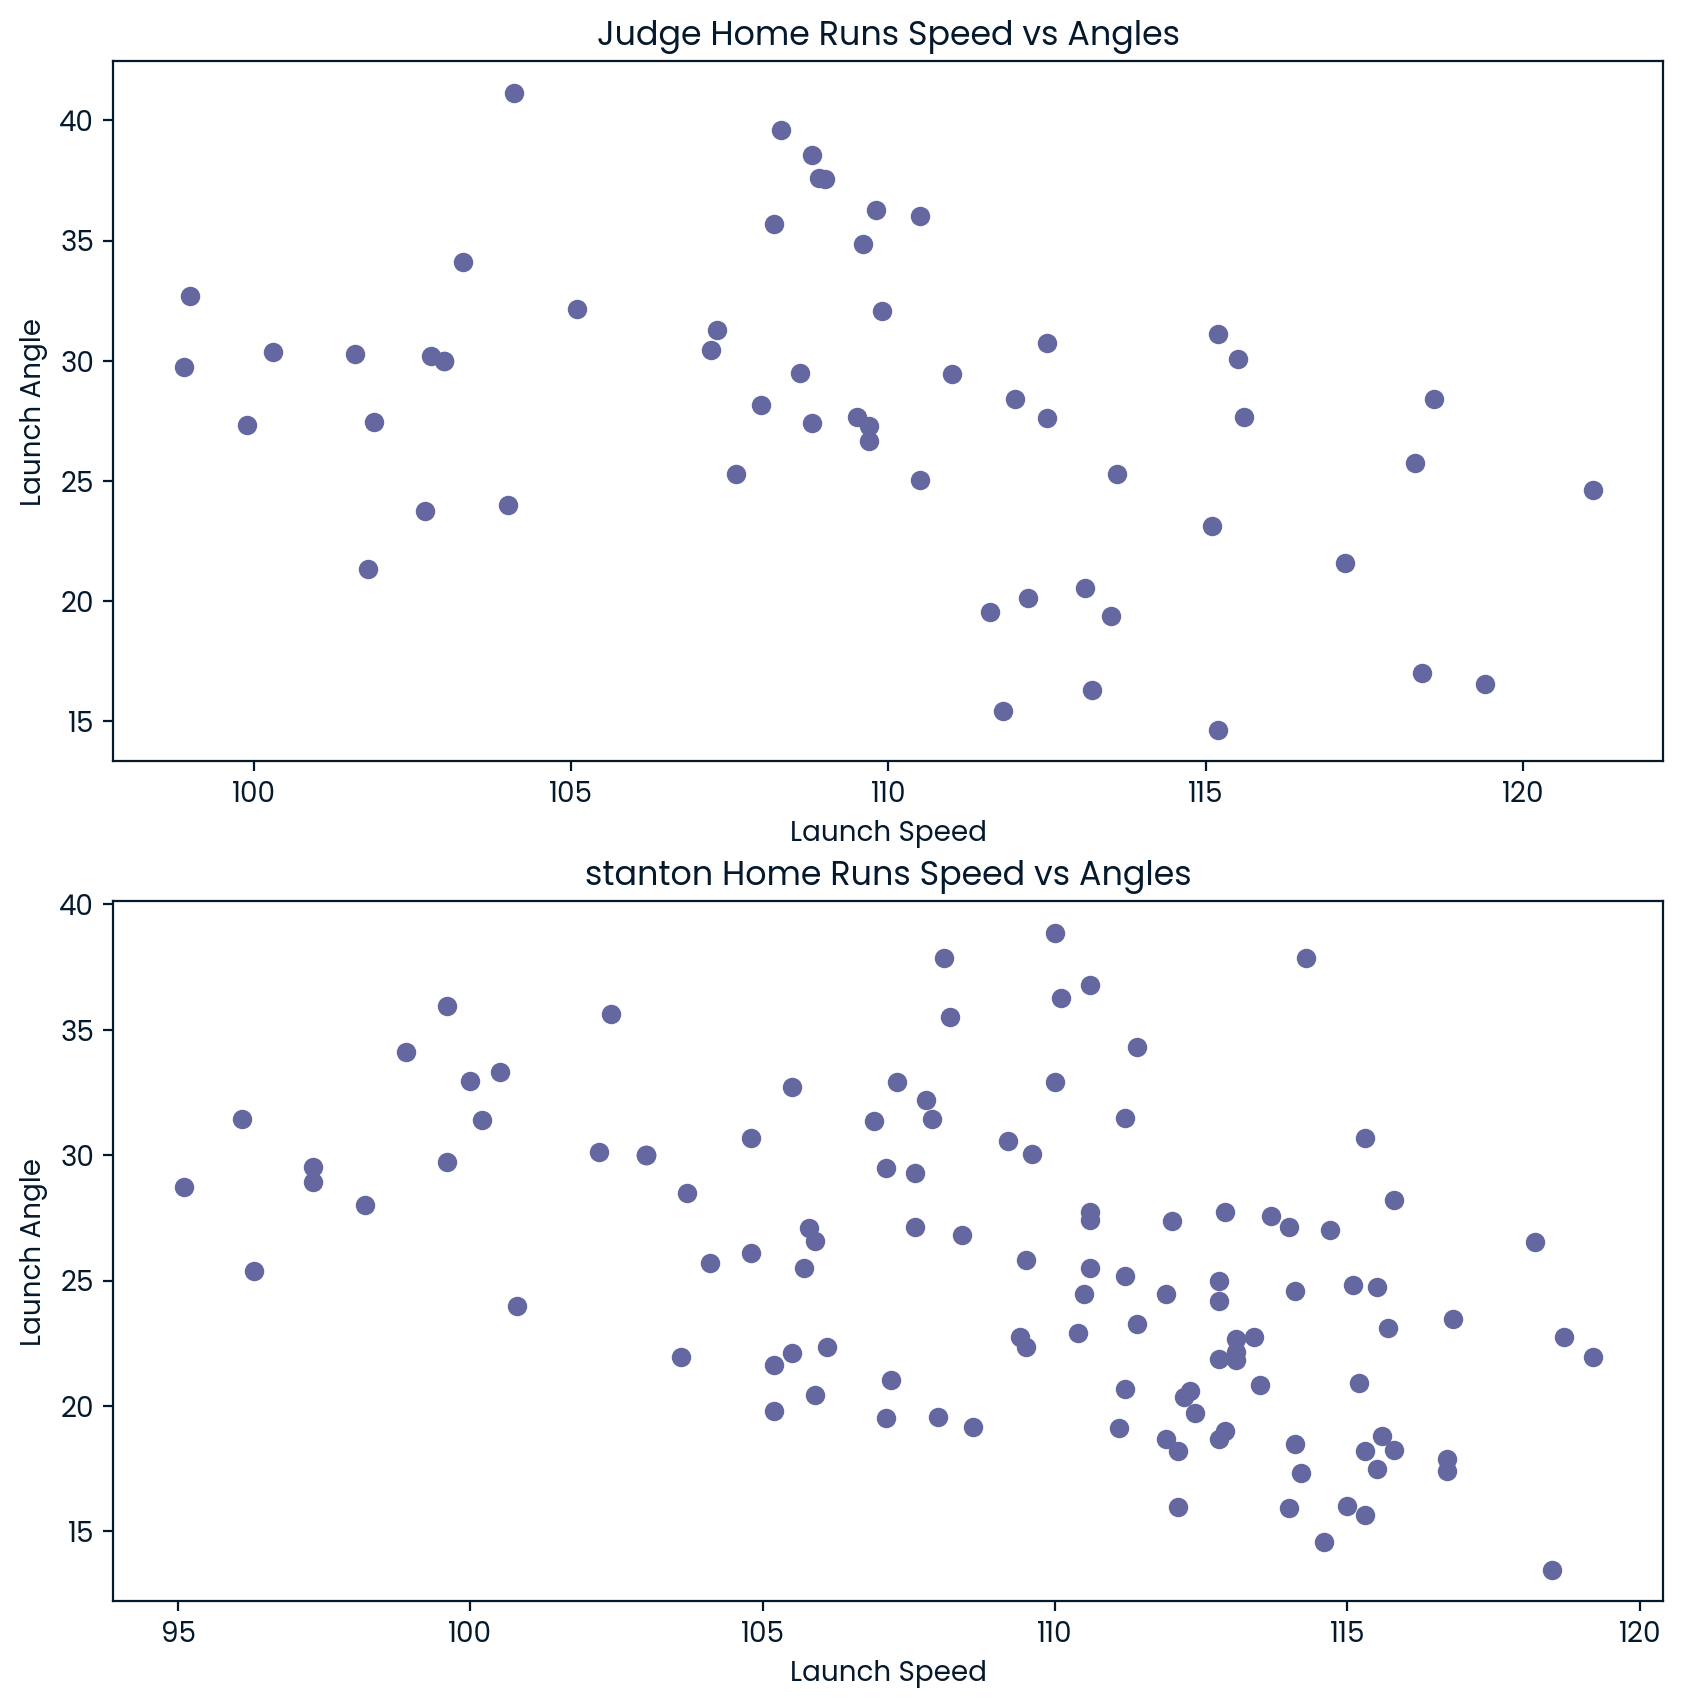

In [218]:
condition = judge['events'] == 'home_run'
judge_mean_hr_speed = judge[condition]['launch_speed'].mean().round(2)
judge_mean_hr_angle = judge[condition]['launch_angle'].mean().round(2)
fig1, ax1 = plt.subplots(2,1, figsize=(10,10))
ax1[0].scatter(x = judge[condition]['launch_speed'],y = judge[condition]['launch_angle'])
ax1[0].set_xlabel('Launch Speed')
ax1[0].set_ylabel('Launch Angle')
ax1[0].set_title('Judge Home Runs Speed vs Angles')
condition = stanton['events'] == 'home_run'
stanton_mean_hr_speed = stanton[condition]['launch_speed'].mean().round(2)
stanton_mean_hr_angle = stanton[condition]['launch_angle'].mean().round(2)
ax1[1].scatter(x = stanton[condition]['launch_speed'],y = stanton[condition]['launch_angle'])
ax1[1].set_xlabel('Launch Speed')
ax1[1].set_ylabel('Launch Angle')
ax1[1].set_title('stanton Home Runs Speed vs Angles')

fig1.show()
print(stanton_mean_hr_speed, stanton_mean_hr_angle)
print(judge_mean_hr_speed, judge_mean_hr_angle)

player_hr = "Stanton"

In [219]:
x = judge[judge['events'] == 'home_run']['release_speed']
y = stanton[stanton['events'] == 'home_run']['release_speed']
print(x.median()
,y.median())
player_fast = "Judge"

91.69999999999999 89.5


In [220]:
jhr = judge['events'] == 'home_run'
jznes = judge['zone'] < 11
shr = stanton['events'] == 'home_run'
sznes = stanton['zone'] < 11
judge_strike_hr = pd.DataFrame(judge[jhr & jznes])
stanton_strike_hr = pd.DataFrame(stanton[shr & sznes])
judge_strike_hr['zone_x'] = judge_strike_hr.apply(assign_x_coord,axis=1)
judge_strike_hr['zone_y'] = judge_strike_hr.apply(assign_y_coord,axis=1)

stanton_strike_hr['zone_x'] = stanton_strike_hr.apply(assign_x_coord,axis=1)
stanton_strike_hr['zone_y'] = stanton_strike_hr.apply(assign_y_coord,axis=1)
